In [1]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Merging 12 Months of Sales Data into a Single File** 

In [2]:
import os
files=[file for file in os.listdir('C:/Users/HP/Desktop/Data Science/sales analysis pandas/SalesAnalysis/Sales_Data')]

all_months_data=pd.DataFrame()

for file in files:
    df=pd.read_csv('C:/Users/HP/Desktop/Data Science/sales analysis pandas/SalesAnalysis/Sales_Data/'+file)
    all_months_data=pd.concat([all_months_data,df])    

In [3]:
all_months_data.shape

(186850, 6)

In [4]:
all_months_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [5]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Data Cleaning

In [6]:
all_months_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
# see all the NaN values

all_months_data[all_months_data.isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
11681,NaN,NaN,NaN,NaN,NaN,NaN
11682,NaN,NaN,NaN,NaN,NaN,NaN
11683,NaN,NaN,NaN,NaN,NaN,NaN
11684,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
all_months_data.dropna(inplace=True)

In [9]:
all_months_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
all_months_data.shape

(186305, 6)

In [11]:
# removing the headers of different csv files that were merged 

all_months_data=all_months_data.loc[all_months_data['Order ID']!='Order ID']

In [12]:
all_months_data.shape

(185950, 6)

In [13]:
all_months_data.index=np.arange(1,len(all_months_data)+1)

In [14]:
all_months_data['Quantity Ordered']=all_months_data['Quantity Ordered'].astype('int')

all_months_data['Price Each']=all_months_data['Price Each'].astype('float')

In [15]:
all_months_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

**Adding New Columns to Dataset**

In [16]:
all_months_data['Month']=pd.to_datetime(all_months_data['Order Date']).dt.month

In [17]:
all_months_data['Year']=pd.to_datetime(all_months_data['Order Date']).dt.year

In [18]:
all_months_data['Sales']=all_months_data['Quantity Ordered']*all_months_data['Price Each']

In [19]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_months_data['City']=all_months_data['Purchase Address'].apply(lambda x:f"{get_city(x)} ({get_state(x)})")

In [20]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,City
1,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2019,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,2019,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,2019,11.99,Los Angeles (CA)


In [21]:
all_months_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Year                  int64
Sales               float64
City                 object
dtype: object

# Data Exploration

### What was the best month for sale and how much was earned that month?

In [22]:
temp=all_months_data.groupby(['Month']).sum()[['Sales']]
temp

,Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


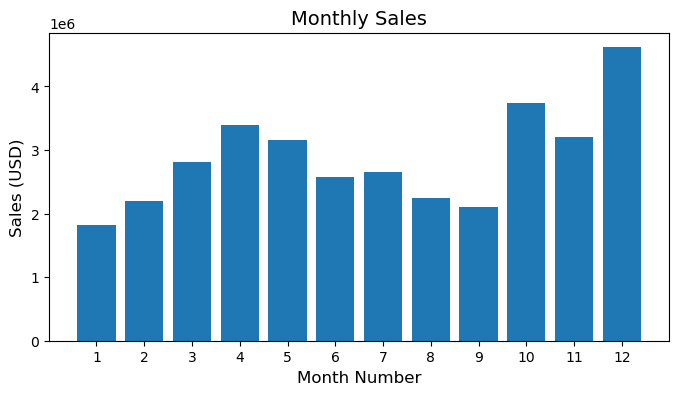

In [23]:
plt.style.use('default')
plt.figure(figsize=(8,4))

plt.bar(temp.index,temp['Sales'])
plt.title('Monthly Sales',size=14)
plt.xticks(temp.index)
plt.xlabel('Month Number',size=12)
plt.ylabel('Sales (USD)',size=12)
plt.show()

**From the above graph we can see that maximum sales are coming from December month followed by November, April respectively**

### Which city has the highest sales?

In [24]:
city_sales=all_months_data.groupby(['City']).sum()['Sales'].sort_values(ascending=True)
city_sales

City
 Portland (ME)          449758.27
 Austin (TX)           1819581.75
 Portland (OR)         1870732.34
 Seattle (WA)          2747755.48
 Dallas (TX)           2767975.40
 Atlanta (GA)          2795498.58
 Boston (MA)           3661642.01
 New York City (NY)    4664317.43
 Los Angeles (CA)      5452570.80
 San Francisco (CA)    8262203.91
Name: Sales, dtype: float64

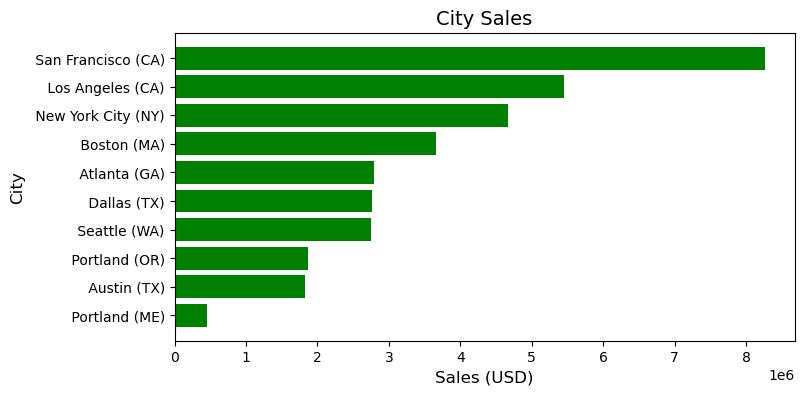

In [25]:
plt.figure(figsize=(8,4))

plt.barh(city_sales.index,city_sales.values,color='green')
plt.title('City Sales',size=14)

plt.xlabel('Sales (USD)',size=12)
plt.ylabel('City',size=12)
plt.show()

**By observing the above, San Francisco accounted for the maximum sales followed by Los Angeles, New York City**

### What time should the advertisement be displayed to maximize the likelihood of customer's buying product?

In [26]:
all_months_data['Order Date']=pd.to_datetime(all_months_data['Order Date'])

In [27]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,City
1,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,11.99,Los Angeles (CA)


In [28]:
all_months_data['Hour']=all_months_data['Order Date'].dt.hour

In [29]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,City,Hour
1,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,11.99,Los Angeles (CA),9


In [30]:
temp1=all_months_data.groupby(by=['Hour']).sum()['Sales']

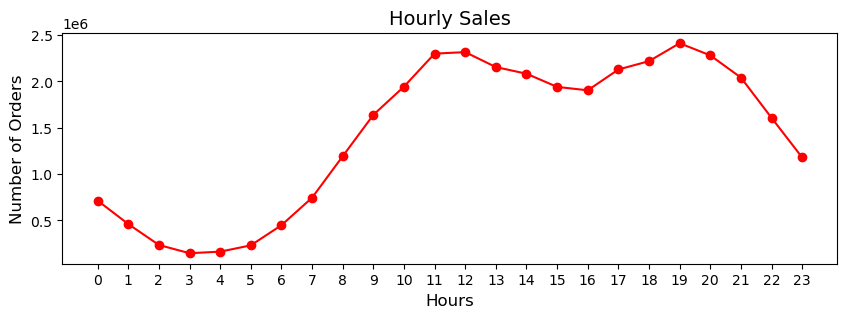

In [31]:
plt.figure(figsize=(10,3))

plt.plot(temp1.index,temp1.values,color='red',marker='o')
plt.title('Hourly Sales',size=14)
plt.xticks(temp1.index)
plt.xlabel('Hours',size=12)
plt.ylabel('Number of Orders',size=12)
plt.show()

**From the line chart above people likely to purchase product during 10 AM-2 PM and 5 PM-9 PM which is the right time to display the advertisement whereas least active during early morning between 1 AM-6 AM.**

### Top 10 Products Sold

In [32]:
temp1=all_months_data.groupby(by=['Product']).sum()[['Quantity Ordered']].sort_values(by=['Quantity Ordered'],
                                                                    ascending=False).reset_index().head(10)

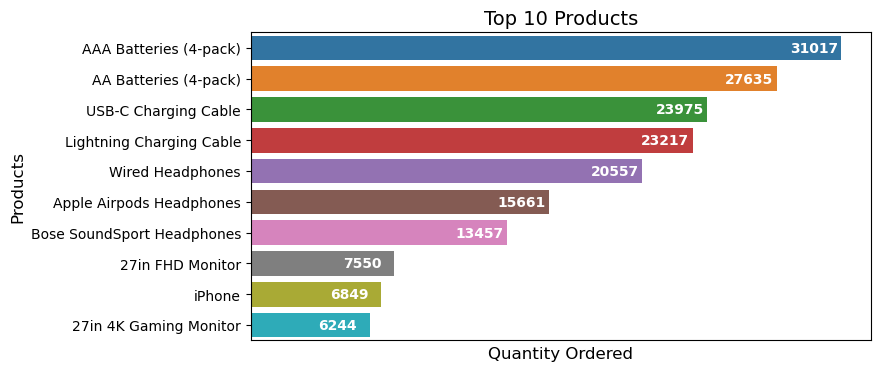

In [45]:
plt.figure(figsize=(8,4))

ax=sns.barplot(temp1,y='Product',x='Quantity Ordered')
for i in ax.containers:
    ax.bar_label(i,padding=-37,size=10,color='white',fontweight='bold')
    
plt.title('Top 10 Products',size=14)
plt.ylabel('Products',size=12)
plt.xlabel('Quantity Ordered',size=12)
plt.xticks([])

plt.show()

### Find the top products and why it is sold mostly

In [34]:
temp2=all_months_data.groupby(by=['Product']).mean()[['Price Each']].sort_values(by=['Product']).reset_index()
temp2

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


In [35]:
temp3=all_months_data.groupby(by=['Product']).sum()[['Quantity Ordered']].sort_values(by=['Product']).reset_index()

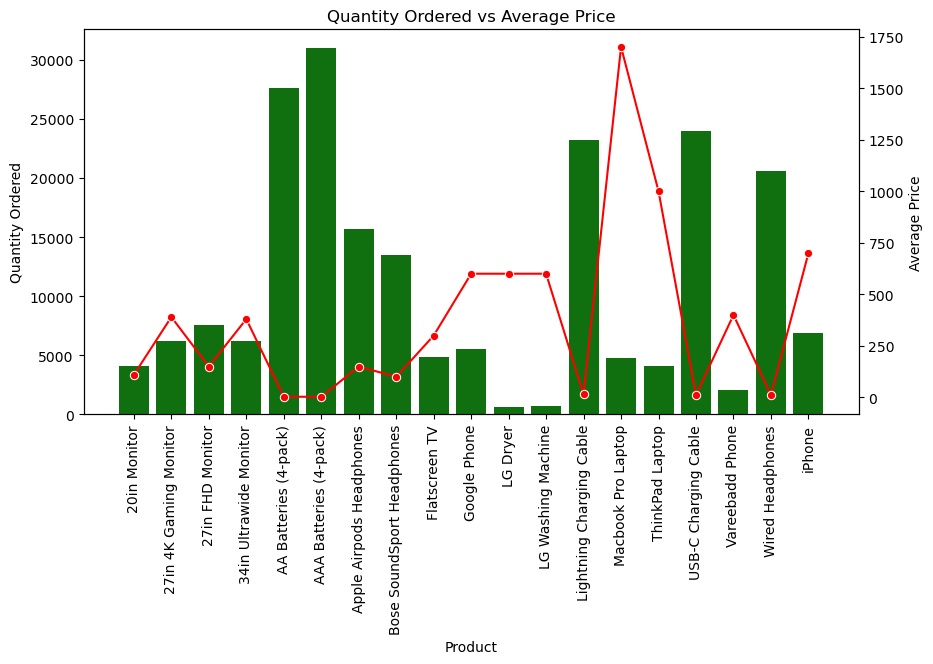

In [36]:
fig, ax1 = plt.subplots(figsize=(10,5))
plt.style.use('default')
ax2 = ax1.twinx()

sns.barplot(x='Product', y='Quantity Ordered',data=temp3,ax=ax1, color='g')
sns.lineplot(x='Product', y='Price Each',marker='o',data=temp2, ax=ax2, color='r')

ax1.set_xticks(ticks=np.arange(len(temp3)),labels=temp3['Product'],rotation=90)
ax2.set_ylabel('Average Price')

plt.title('Quantity Ordered vs Average Price')

plt.show()

**From the above graph it is seen that low average price resulted in High Sales and vice-a-versa**